data shape: (500, 140), Labels shape: (500,)


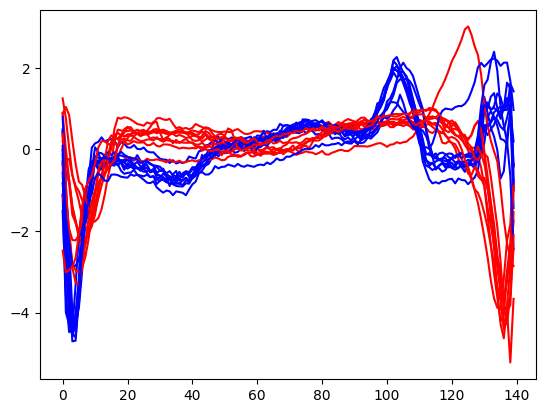

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
##　以下是一个使用sklearn构建多层感知机进行手写数字识别的示例

# 读取数据集
data_train = np.loadtxt('./data/ECG5000_TRAIN.txt')
# print(data_train.shape)

# 获取data和label
X_train, y_train = data_train[:, 1:], data_train[:, 0]
y_train = np.where(y_train>1, -1, 1) # 更改标签
# print(y_train)
print(f'data shape: {X_train.shape}, Labels shape: {y_train.shape}')

# 可视化10个正负样本 
pos_idx = np.where(y_train==1)[0]
neg_idx = np.where(y_train==-1)[0]
# print(pos_idx.shape)

plt.figure()
for idx in range(10):
    plt.plot(X_train[pos_idx[idx], :], 'b')
    plt.plot(X_train[neg_idx[idx], :], 'r')
plt.show()


Accuracy: 0.9833333333333333


/tmp/ipykernel_59593/2562939025.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(np.unique(y_test)))
/tmp/ipykernel_59593/2562939025.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + list(np.unique(y_test)))


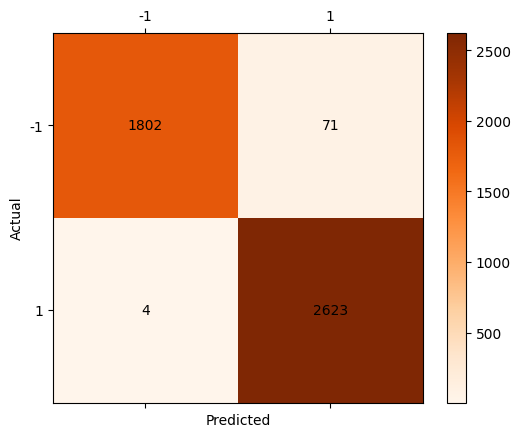

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix


# 算法1：SVM模型
from sklearn import svm

SVM_Model = svm.SVC(kernel='rbf', C=1.0, gamma='auto') # gamma='auto', set gamma = 1 / n_features
SVM_Model.fit(X_train, y_train)

# 读取测试数据集
data_train = np.loadtxt('./data/ECG5000_TEST.txt')
# print(data_train.shape)

# 获取data和label
X_test, y_test = data_train[:, 1:], data_train[:, 0]
y_test = np.where(y_test>1, -1, 1) # 更改标签

# 预测结果
y_pred = SVM_Model.predict(X_test)
 
# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 使用matplotlib绘制混淆矩阵
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap=plt.cm.Oranges)  # 选择颜色映射

# 为图添加颜色条
plt.colorbar(cax)

# 设置坐标轴
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels([''] + list(np.unique(y_test)))
ax.set_yticklabels([''] + list(np.unique(y_test)))

# 在混淆矩阵的各个单元格中添加数值标签
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')
plt.show()



# # 打印刚刚的SVM模型参数和可视化其支持向量(Support Vectors)
# print("支持向量个数:", len(SVM_Model.support_))
# print("支持向量的索引:", SVM_Model.support_)
# print("支持向量:", SVM_Model.support_vectors_)
# print("对偶系数:", SVM_Model.dual_coef_)
# print("截距:", SVM_Model.intercept_)

下面使用MLP（多层感知机）模型

features dim:  140
Accuracy: 0.9804444444444445


/tmp/ipykernel_59593/2939060364.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(np.unique(y_test)))
/tmp/ipykernel_59593/2939060364.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + list(np.unique(y_test)))


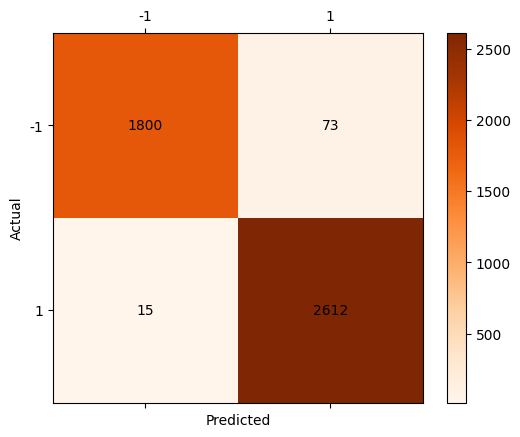

In [3]:
##　以下是一个使用sklearn构建多层感知机进行手写数字识别的示例
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
 
# 加载数据集 
# 数据预处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
print("features dim: ", X_scaled.shape[1])

# 构建模型
model = MLPClassifier(hidden_layer_sizes=(128, 32), max_iter=100, activation='relu', solver='adam', verbose=False, random_state=1, early_stopping=True, validation_fraction=0.1)
 
# 训练模型
model.fit(X_scaled, y_train)
 
# 预测结果
X_scaled = scaler.fit_transform(X_test)
y_pred = model.predict(X_scaled)
 
# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 使用matplotlib绘制混淆矩阵
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap=plt.cm.Oranges)  # 选择颜色映射

# 为图添加颜色条
plt.colorbar(cax)

# 设置坐标轴
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels([''] + list(np.unique(y_test)))
ax.set_yticklabels([''] + list(np.unique(y_test)))

# 在混淆矩阵的各个单元格中添加数值标签
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

# 显示图表
plt.show()

继续更换模型，使用基础CNN模型

In [6]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F

''' 
自定义数据集，需要定义号‘__getitem__’函数
'''
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        x = self.data[index]
        y = self.labels[index]
        return x, y
    
    
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, 32 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
def train_model(model, dataloader, criterion, optimizer, num_epochs=50):
    model.train()
    for epoch in range(num_epochs):
        for data, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')
        
       
new_X_train = np.zeros([500, 16, 16])
new_y_train = np.where(y_train==-1,0,1)
new_X_train[:,0:10, 0:14] = X_train.reshape([500,10,14])
data, labels = new_X_train, new_y_train
# print(data.shape)
# Convert data and labels to PyTorch tensors
data = torch.tensor(data, dtype=torch.float32).unsqueeze(1)
labels = torch.tensor(labels, dtype=torch.long)

# Create dataset and dataloader
dataset = CustomDataset(data, labels)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# 定义模型，损失函数以及优化器
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train your model
train_model(model, dataloader, criterion, optimizer)

Epoch 1, Loss: 0.19439288973808289
Epoch 2, Loss: 0.2238939106464386
Epoch 3, Loss: 0.1910659372806549
Epoch 4, Loss: 0.010989646427333355
Epoch 5, Loss: 0.01376060675829649
Epoch 6, Loss: 0.03400794044137001
Epoch 7, Loss: 0.020505893975496292
Epoch 8, Loss: 0.003959460649639368
Epoch 9, Loss: 0.14551827311515808
Epoch 10, Loss: 0.10840857028961182
Epoch 11, Loss: 0.0008037086809054017
Epoch 12, Loss: 0.15660834312438965
Epoch 13, Loss: 0.0035716809798032045
Epoch 14, Loss: 0.030991818755865097
Epoch 15, Loss: 0.0024181667249649763
Epoch 16, Loss: 0.0106376176699996
Epoch 17, Loss: 0.0011003365507349372
Epoch 18, Loss: 0.008256514556705952
Epoch 19, Loss: 0.0293897595256567
Epoch 20, Loss: 0.0014812502777203918
Epoch 21, Loss: 0.0026921662501990795
Epoch 22, Loss: 0.0016911039128899574
Epoch 23, Loss: 0.00025020932662300766
Epoch 24, Loss: 0.00033076098770834506
Epoch 25, Loss: 0.00022324365272652358
Epoch 26, Loss: 0.0035173543728888035
Epoch 27, Loss: 0.0005086068995296955
Epoch 28,

Accuracy of the model on the test data: 98.4%
Average loss: 0.09204242685101094


/tmp/ipykernel_59593/3686781161.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(np.unique(y_pred)))
/tmp/ipykernel_59593/3686781161.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + list(np.unique(y_pred)))


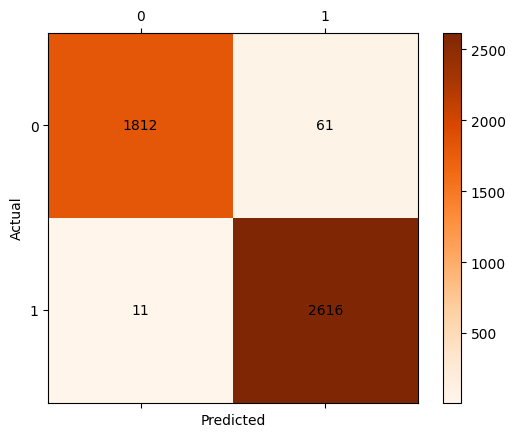

In [7]:

# 评估模型
new_X_test = np.zeros([4500, 16, 16])
new_y_test = np.where(y_test==-1,0,1)
new_X_test[:,0:10, 0:14] = X_test.reshape([4500,10,14])
test_data, test_labels = new_X_test, new_y_test
test_data = torch.tensor(test_data, dtype=torch.float32).unsqueeze(1)
test_labels = torch.tensor(test_labels, dtype=torch.long)

test_dataset = CustomDataset(test_data, test_labels)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

model.eval()

correct = 0
total = 0
total_loss = 0.0

y_pred = []
y_true = []

with torch.no_grad():  # 关闭梯度计算
    for data, labels in test_loader:
        outputs = model(data)
        loss = F.cross_entropy(outputs, labels)  # 计算损失
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        y_pred.extend(predicted.cpu().numpy())  # 收集预测结果
        y_true.extend(labels.cpu().numpy())     # 收集真实标签

average_loss = total_loss / len(test_loader)
accuracy = correct / total
print(f'Accuracy of the model on the test data: {100 * accuracy}%')
print(f'Average loss: {average_loss}')



# 使用matplotlib绘制混淆矩阵
# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap=plt.cm.Oranges)  # 选择颜色映射

# 为图添加颜色条
plt.colorbar(cax)

# 设置坐标轴
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels([''] + list(np.unique(y_pred)))
ax.set_yticklabels([''] + list(np.unique(y_pred)))

# 在混淆矩阵的各个单元格中添加数值标签
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

# 显示图表
plt.show()